In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
from nltk.corpus import stopwords # To remove useless words
from nltk.stem.lancaster import LancasterStemmer

# imprt packages tat help to create document term matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [5]:
#Stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
#!pwd
#%cd
#%cd sample_data
#!ls


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:

# Read the csv
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv',encoding='utf-8')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
# check on the count of rows - dataset
df.shape

(159571, 8)

- Can see that there are about  159571 comments present in the dataset, with about 8 columns. In those comment_text contains the comment, rest of the columns can be considered as the deciding factor/target variable (excluding id as it just is present to differentiate the comments).

In [10]:
# Check for Null values
df.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [11]:
# check for additional information, if null or data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [12]:
# check on the min and max value of each numerical column
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Can see that the numerical values have a min value of 0 and max value of 1. Each of the features - toxic, severe_toxic, obscene, threat, insult, identity_hate have a min value of 0 indicating that feature isnt present for the comment. Further the max value for those features is 1, indicating that it is present for the comment, stating that it is toxic.
- Rest of the values within the feature dont speak out much. For instance - As they are calculating mean and standard deviation for all the values within the feature.

In [13]:
# check on one of the comments present

df['comment_text'].values[289]

"I'm focussing on doing science at the moment (leading the revolution!)."

In [14]:
# toxic comment
df['comment_text'].values[43]

'FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!'

In [15]:
df['comment_text'].values[100]

'However, the Moonlite edit noted by golden daph was me (on optus ...)  Wake up wikkis.  So funny'

In [16]:
# Exploratory Data Analysis


In [17]:
df['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [18]:
# check the percentage of comments that are toxic compared to normal comments
df.toxic.value_counts(normalize=True)

0    0.904156
1    0.095844
Name: toxic, dtype: float64

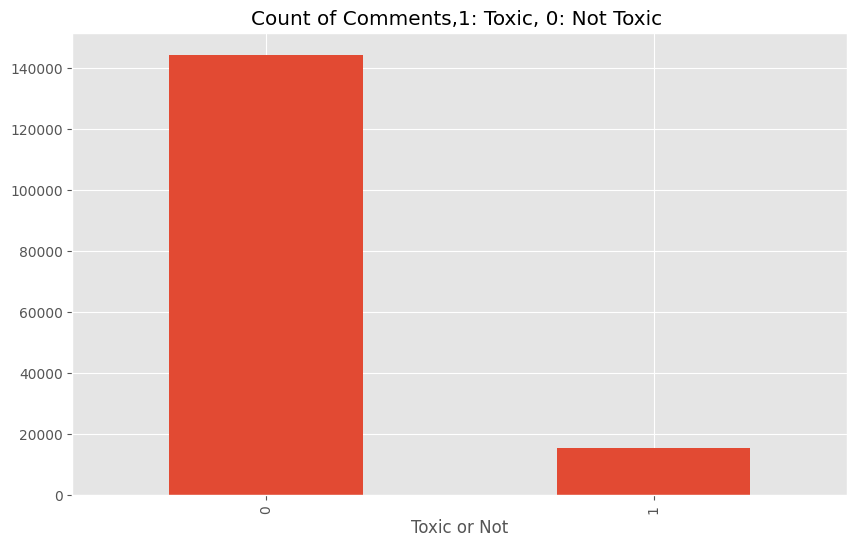

In [19]:
ax = df['toxic'].value_counts().sort_index() \
    .plot( kind='bar',
           title ='Count of Comments,1: Toxic, 0: Not Toxic ',
           figsize=(10,6))
ax.set_xlabel('Toxic or Not')
plt.show()

In [20]:
# Check on the toxic comments, hence filtering data
d = df.query('toxic == 1')
d['comment_text'].count()

15294

In [21]:
d

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0


In [22]:
# create a new subset of data by only taking the target i.e. toxic indicating features
df_count = df.iloc[:,2:].sum()
df_count

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

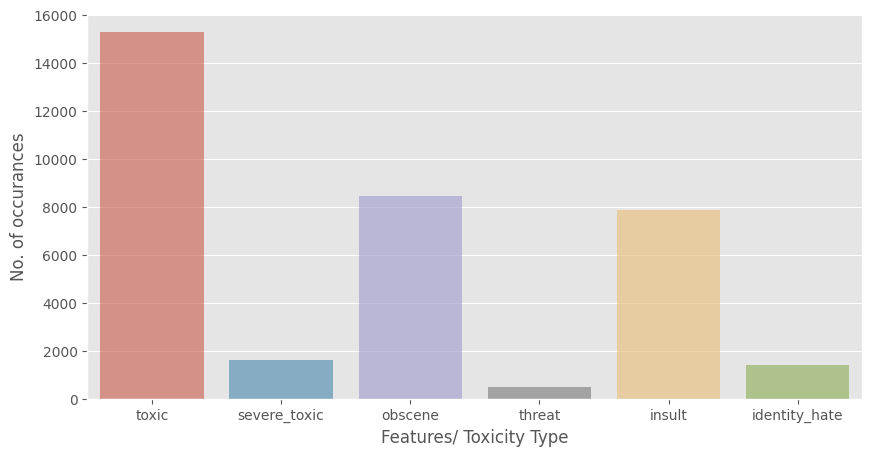

In [23]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x= df_count.index,y = df_count.values, alpha=0.6)
ax.set_xlabel('Features/ Toxicity Type')
ax.set_ylabel('No. of occurances')

plt.show()

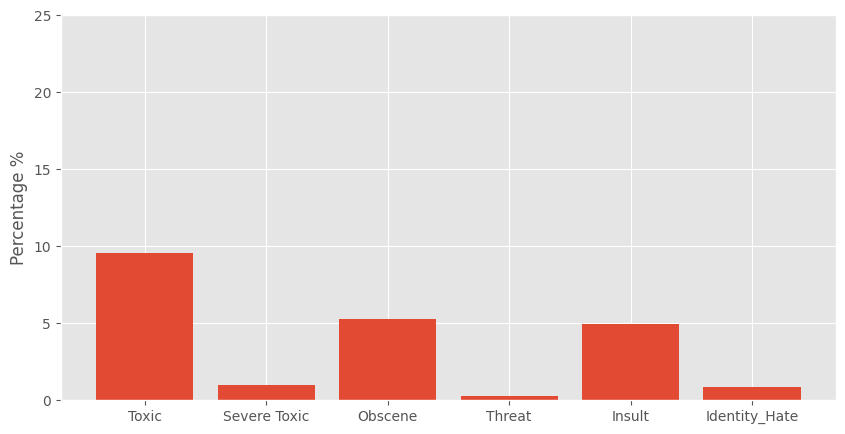

In [24]:
plt.figure(figsize=(10,5))
# Plot percentage of each of the toxicity type feature
sum_tox = (df['toxic'].sum()/ len(df) )*100
sum_sev = (df['severe_toxic'].sum()/ len(df) )*100
sum_obs = (df['obscene'].sum()/ len(df) )*100
sum_thr = (df['threat'].sum()/ len(df) )*100
sum_ins = (df['insult'].sum()/ len(df) )*100
sum_ide = (df['identity_hate'].sum()/ len(df) )*100

ax = plt.bar(np.arange(6),[sum_tox,sum_sev,sum_obs,sum_thr,sum_ins,sum_ide])
plt.ylabel('Percentage %')
plt.yticks(np.arange(0,30,5))
plt.xticks(np.arange(6), ('Toxic','Severe Toxic', 'Obscene', 'Threat', 'Insult','Identity_Hate'))
plt.show()

In [25]:
# Pre-process the data

In [26]:
#Before preprocessing
df['comment_text'][40]

'"\n Sure, but the lead must briefly summarize Armenia\'s history. I simply added what I found necessary. If anyone thinks this or that sentence is redundant for the lead, they are welcome to remove make edits.  talk  "'

In [27]:
# Text preprocessing steps - remove numbers, capital letters, punctuation, '\n'
import re
import string

def preprocess(comment):
    #print(comment)

    # remove all numbers with letters attached to them
    comment =re.sub('\w*\d\w*', ' ', comment)

    # Remove all ''t' in the string and replace it with a 't'
    comment = re.sub("\'t", "t", comment)

    # Remove all ''st' in the string and replace it with a 's'
    comment = re.sub("\'s", "s", comment)

    # replace punctuation with white space and use of .lower() to convert all strings to lowercase
    comment = re.sub('[%s]' % re.escape(string.punctuation), ' ', comment.lower())

    # Remove all '\n' in the string and replace it with a space
    comment = re.sub("\n", " ", comment)

    # Remove all '\t' in the string and replace it with a space
    comment = re.sub("\t", " ", comment)

    # Remove all non-ascii characters
    comment = re.sub(r'[^\x00-\x7f]',r' ', comment)
    return comment

# Preprocess the comments column
df['comment_text'] = df['comment_text'].apply(lambda comment: preprocess(comment))


#preprocess(df.iloc[0].comment_text)

In [28]:
df['comment_text'][40]

'   sure  but the lead must briefly summarize armenias history  i simply added what i found necessary  if anyone thinks this or that sentence is redundant for the lead  they are welcome to remove make edits   talk   '

In [29]:
# Word Cloud

In [30]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud#, STOPWORDS, ImageColorGenator
from nltk.corpus import stopwords


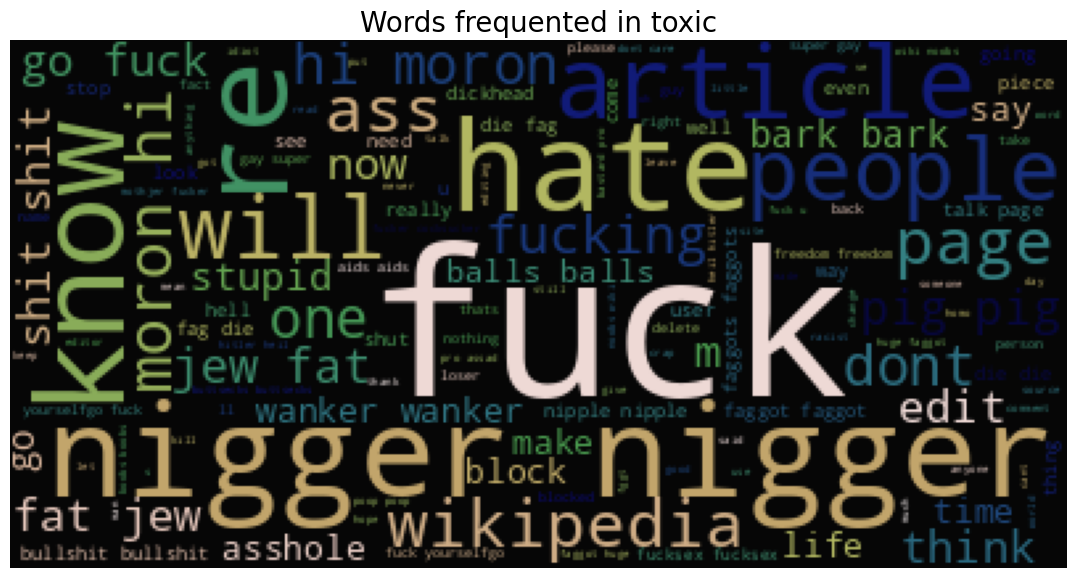

In [31]:
# For Toxic feature
subset=df[df['toxic']==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000)

wc.generate(" ".join(text))

plt.figure(figsize=(30,30))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequented in {}".format('toxic'), fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
plt.show()

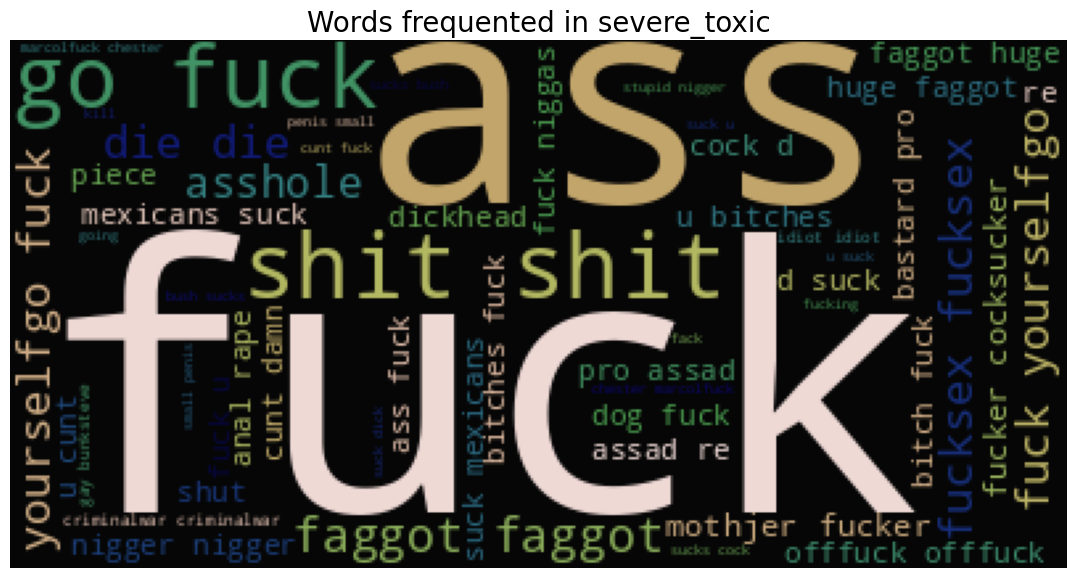

In [32]:
# For Severe Toxic feature
subset=df[df['severe_toxic']==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000)

wc.generate(" ".join(text))

plt.figure(figsize=(30,30))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequented in {}".format('severe_toxic'), fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
plt.show()

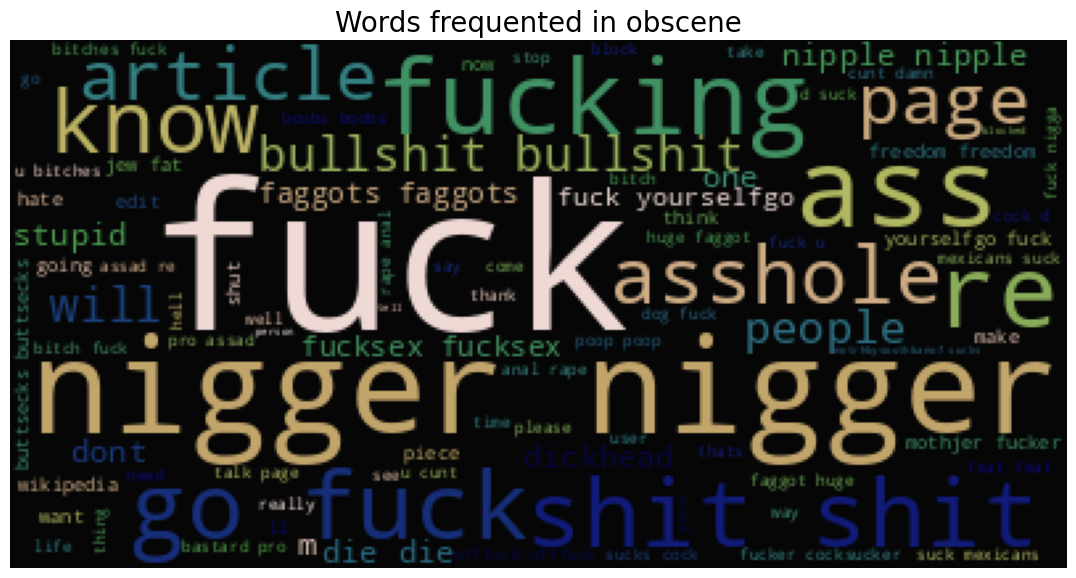

In [33]:
# For obscene feature
subset=df[df['obscene']==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000)

wc.generate(" ".join(text))

plt.figure(figsize=(30,30))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequented in {}".format('obscene'), fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
plt.show()

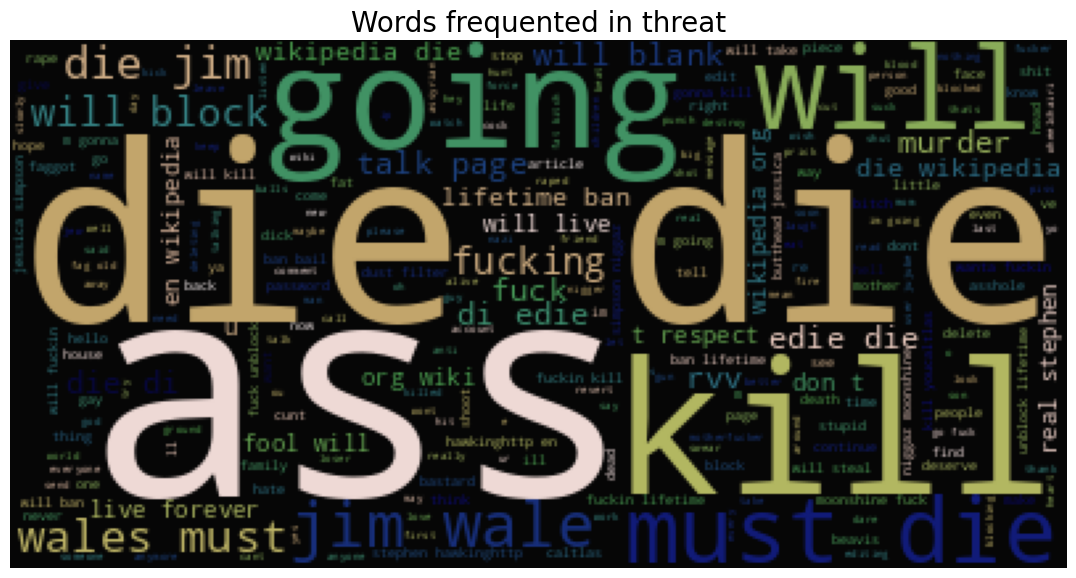

In [34]:
# For threat feature
subset=df[df['threat']==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000)

wc.generate(" ".join(text))

plt.figure(figsize=(30,30))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequented in {}".format('threat'), fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
plt.show()

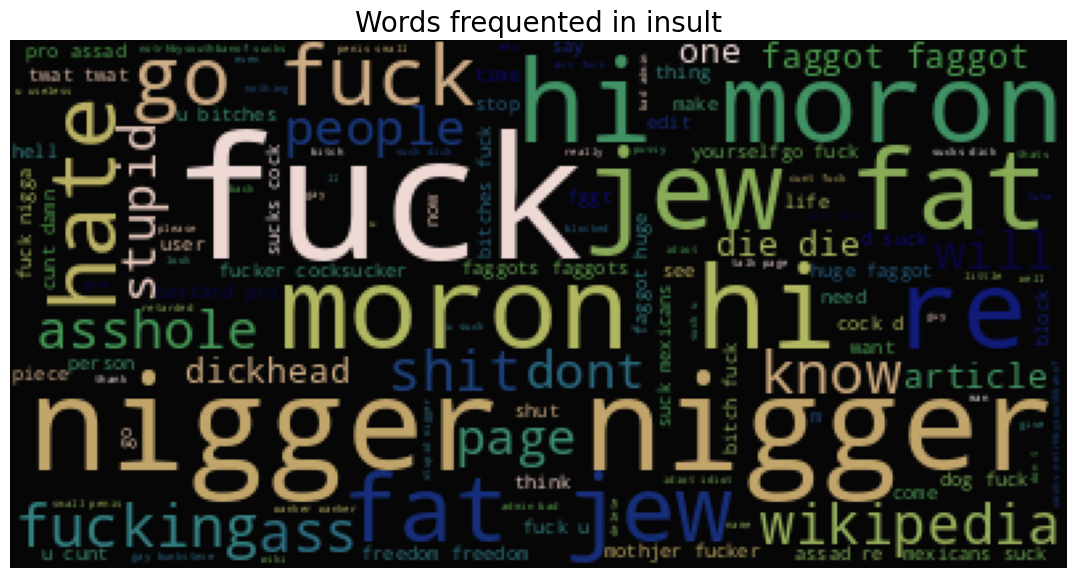

In [35]:
# For insult feature
subset=df[df['insult']==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000)

wc.generate(" ".join(text))

plt.figure(figsize=(30,30))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequented in {}".format('insult'), fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
plt.show()

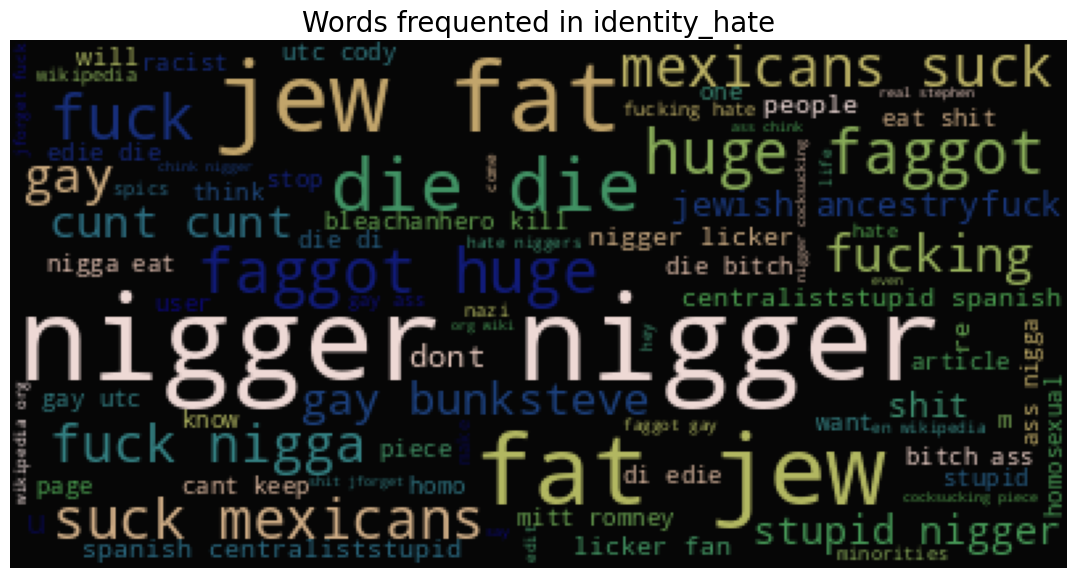

In [36]:
# For identity_hate feature
subset=df[df['identity_hate']==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000)

wc.generate(" ".join(text))

plt.figure(figsize=(30,30))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequented in {}".format('identity_hate'), fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
plt.show()

- From above wordcloud we can see the most frequent words in each of the feature indicating the comment being toxic in that level.

- will try to test on the entire dataset, see accuracy. i

- we saw that there are about 15294 set of comments which are toxic out of the entire dataset (159571). This would create class imbalance issue. So we can take non toxic such that they are about 50% of rest so that data is not imbalanced.
-  such that they are good at all feature level


In [37]:
# Runnign Models on the data

In [38]:
# Import package for splitting data and evaluate model performance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score,precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix, accuracy_score

# IMmport ML algos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [39]:
"""def model_check(df, label, vectorizer, ngram):

    # figure the explanatory variable & Response variable i.e. the text on which we need to figure their toxicity
    X = df.comment_text
    y = df[label]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 17)

    # Create a Vectorizer and further remove stopwords from the table
    vect1 = vectorizer(ngram_range= (ngram), stop_words='english')

    X_train_vec1 = vect1.fit_transform(X_train) # to learn the vocabulory and retirn term-document matrix
    X_test_vec1 = vect1.transform(X_test) # transform all the learning from X_train to the X_test samples

    lr = LogisticRegression()
    lr.fit(X_train_vec1, y_train)
    print('Logistic Regression fit done!')
    # Test
    lr_y_test=lr.predict(X_test_vec1)

    knn = KNeighborsClassifier()
    knn.fit(X_train_vec1, y_train)
    print('KNeighborsClassifier fit done!')
    knn_y_test=knn.predict(X_test_vec1)

    bnb = BernoulliNB()
    bnb.fit(X_train_vec1, y_train)
    print('BernoulliNB fit done!')
    bnb_y_test=bnb.predict(X_test_vec1)


    mnb = MultinomialNB()
    mnb.fit(X_train_vec1, y_train)
    print('MultinomialNB fit done!')
    mnb_y_test=mnb.predict(X_test_vec1)


    svm = LinearSVC()
    svm.fit(X_train_vec1, y_train)
    print('Support Vector Classifier fit done!')
    svm_y_test=svm.predict(X_test_vec1)


    randomforest = RandomForestClassifier(n_estimators= 100, random_state= 17)
    randomforest.fit(X_train_vec1, y_train)
    print('RandomForestClassifier fit done!')
    randomforest_y_test=randomforest.predict(X_test_vec1)


    #Calculate the accuracy of all Models
    metric_data = {
        'Accuracy' : [accuracy_score(lr_y_test,y_test),
                      accuracy_score(knn_y_test,y_test),
                      accuracy_score(bnb_y_test,y_test),
                      accuracy_score(mnb_y_test,y_test),
                      accuracy_score(svm_y_test,y_test),
                      accuracy_score(randomforest_y_test,y_test),
                      ],
        'F1 Score':[f1_score(lr_y_test,y_test), f1_score(knn_y_test,y_test),
                                f1_score(bnb_y_test,y_test), f1_score(mnb_y_test,y_test),
                                f1_score(svm_y_test,y_test), f1_score(randomforest_y_test,y_test)]
    }

    df_metric = pd.DataFrame(metric_data,
                             index = ['Logistic Regression', 'KNN',
                                      'BernoulliNB', 'MultinomialNB','Support Vector Classifier','Random Forest'])

    return metric_data





SyntaxError: ignored

In [89]:
# figure the explanatory variable & Response variable i.e. the text on which we need to figure their toxicity
X = df.comment_text
y = df['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 10)

# Create a Vectorizer and further remove stopwords from the table
vect1 = TfidfVectorizer(ngram_range= ((1,1)), stop_words='english')

X_train_vec1 = vect1.fit_transform(X_train) # to learn the vocabulory and retirn term-document matrix
X_test_vec1 = vect1.transform(X_test) # transform all the learning from X_train to the X_test samples


In [41]:
# logistic Regression

In [42]:
lr = LogisticRegression()
lr.fit(X_train_vec1, y_train)
print('Logistic Regression fit done!')
# Test
lr_y_test=lr.predict(X_test_vec1)

accuracy_score(lr_y_test,y_test)

Logistic Regression fit done!


0.9571565842245989

In [43]:
# KNeighborsClassifier
#knn = KNeighborsClassifier()
#knn.fit(X_train_vec1, y_train)
#print('KNeighborsClassifier fit done!')
#knn_y_test=knn.predict(X_test_vec1)


#accuracy_score(knn_y_test,y_test)

In [44]:
# BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train_vec1, y_train)
print('BernoulliNB fit done!')
bnb_y_test=bnb.predict(X_test_vec1)


accuracy_score(bnb_y_test,y_test)

BernoulliNB fit done!


0.9476102941176471

In [45]:
# MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_vec1, y_train)
print('MultinomialNB fit done!')
mnb_y_test=mnb.predict(X_test_vec1)

accuracy_score(mnb_y_test,y_test)

MultinomialNB fit done!


0.9245279077540107

In [46]:
# Linear SVC
svm = LinearSVC()
svm.fit(X_train_vec1, y_train)
print('Support Vector Classifier fit done!')
svm_y_test=svm.predict(X_test_vec1)



accuracy_score(svm_y_test,y_test)

Support Vector Classifier fit done!


0.9608121657754011

In [47]:
# Random Forest Classifier
#randomforest = RandomForestClassifier(n_estimators= 100, random_state= 17)
#randomforest.fit(X_train_vec1, y_train)
#print('RandomForestClassifier fit done!')
#randomforest_y_test=randomforest.predict(X_test_vec1)


#accuracy_score(randomforest_y_test,y_test)

In [48]:
#import time

#t0=time.time()
#df_tox_cv = model_check(df,'toxic',TfidfVectorizer,(1,1))
#df_tox_cv.rename(columns = {'Accuracy': 'Accuracy for TOXIC (label)',
#                            'F1 Score':'F1 Score for TOXIC (label)'}, inplace = True)

#t1 = time.time()

#print("Time taken for the whole model check",(t1-t0))

#df_tox_cv

From all the above classifiers as of today can see SVC have a better accuracy. Further will check f1 score for each

In [49]:
metric_data = {
'Accuracy' : [accuracy_score(lr_y_test,y_test),
              #accuracy_score(knn_y_test,y_test),
              accuracy_score(bnb_y_test,y_test),
              accuracy_score(mnb_y_test,y_test),
              accuracy_score(svm_y_test,y_test),
              #accuracy_score(randomforest_y_test,y_test),
              ],
'F1 Score':[f1_score(lr_y_test,y_test), #f1_score(knn_y_test,y_test),
                        f1_score(bnb_y_test,y_test), f1_score(mnb_y_test,y_test),
                        f1_score(svm_y_test,y_test), #f1_score(randomforest_y_test,y_test)
                        ]
}

df_metric = pd.DataFrame(metric_data,
                      index = ['Logistic Regression', #'KNN',
                              'BernoulliNB', 'MultinomialNB','Support Vector Classifier',#'Random Forest'
                               ])
df_metric

,Accuracy,F1 Score
Logistic Regression,0.957157,0.719924
BernoulliNB,0.947610,0.644154
MultinomialNB,0.924528,0.328563
Support Vector Classifier,0.960812,0.764558


In [50]:
!pip install -q streamlit

In [ ]:
# sAMPLE tESTING

In [60]:
test_text = "I hate you moron"
test_tfidf = vect1.transform([test_text])
#display(svm.predict_proba(test_tfidf))
display(svm.predict(test_tfidf)) #i.e. TOXIC

array([1])

In [82]:
text_input = input("ENter a text:")
#vect1 = TfidfVectorizer(ngram_range= ((1,1)), stop_words='english')
X_train_vec1 = vect1.transform([text_input])
result = svm.predict(X_train_vec1)
if result == 1:
  print("Toxic")
else:
  print("Not Toxic")

ENter a text:Her body is perfect. Face, boobs, hips, all of it.
Toxic


In [93]:
import pickle
pickle.dump(vect1, open("tf_idf.pkt", "wb"))
pickle.dump(svm, open("toxic_model.pkt", "wb"))

To Run the application from google collab

1. run the following 3 commands
2. open browser with URL gievn by Tunnel, it would ask for IP (external URL within logs.text file is the IP)
3. the application will open up

In [83]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.498s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [98]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 1.818s
your url is: https://curly-apples-guess.loca.lt


In [78]:
#steps to run the Application on google collab-
#1.run all above codes

In [ ]:
#input texts - her body is so juicy man , ill go eat her (toxic)
# Joke is good for health (non toxic)